# Itinerary Datasets

In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import practicum_utils as utils

In [2]:
files = utils.get_loggi_files()
files

['./data/supply/availability_dist1_ano.csv',
 './data/supply/availability_dist2_ano.csv',
 './data/supply/itinerary_dist1_ano.csv',
 './data/supply/itinerary_dist2_ano.csv']

# Itinerary Drivers Dataset 1

In [3]:
df = pd.read_csv(files[2])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20991 entries, 0 to 20990
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            20991 non-null  int64  
 1   itinerary_id          20991 non-null  object 
 2   driver_id             18284 non-null  object 
 3   created               20991 non-null  object 
 4   accepted              18284 non-null  object 
 5   dropped               1578 non-null   object 
 6   started               18133 non-null  object 
 7   finished              19002 non-null  object 
 8   status                20991 non-null  object 
 9   total_distance        20991 non-null  int64  
 10  transport_type        20991 non-null  object 
 11  product               20991 non-null  object 
 12  product_version       20991 non-null  object 
 13  distribution_center1  20991 non-null  int64  
 14  packages              18150 non-null  float64
 15  delivered_packages 

,Unnamed: 0,itinerary_id,driver_id,created,accepted,dropped,started,finished,status,total_distance,...,delivered_packages,checked_in_at,pickup_checkout_at,pickup_lat,pickup_lng,real_completion_time,pickup_distance,pickup_time,check_in_time,waypoints
0,0,59bf54f6d9bf16ab8c76578f8b03e8bb,5e506cfcfb7cd4d3181b6abba4c76456,19-12-19 09:00,19-12-19 09:05,NaN,19-12-19 09:05,19-12-19 11:16,finished,43434,...,5.0,19-12-19 09:43,19-12-19 09:45,-23.467847,-46.512231,7833.0,5837,1.933333,142.1000,11
1,1,9b9a4cad11ae393b832277b447f1a968,8d29dd0def2357eff973b20241ee8e4f,19-10-14 07:30,19-10-14 07:31,NaN,19-10-14 07:31,19-10-14 08:50,finished,32207,...,9.0,19-10-14 07:32,19-10-14 07:35,-23.467853,-46.512247,4764.0,1524,3.666667,179.0666,14
2,2,542d9fe1c00d45cb1e450adfea35521f,a26395e55f7dfbe49c6154b9984f259f,19-10-10 15:13,19-10-10 15:16,NaN,19-10-10 15:16,19-10-10 15:59,finished,18853,...,1.0,19-10-10 15:17,19-10-10 15:22,-23.467844,-46.512233,2598.0,18853,5.350000,179.5833,2
3,3,9881771a89ba0ea95eef7130598aea25,fe0ebd7aa7e18d71b961a0ccbb8d6319,19-11-01 09:13,19-11-01 09:14,NaN,19-11-01 09:14,19-11-01 12:04,finished,31535,...,9.0,19-11-01 10:05,19-11-01 10:15,-23.467831,-46.512223,10211.0,14281,9.850000,129.6000,10
4,4,a50ada6f391a4fcacdfc7072653f078f,f4e0f38852ef321b7989a87a9639e419,19-11-06 06:10,19-11-06 06:14,NaN,19-11-06 06:14,19-11-06 08:51,finished,74262,...,9.0,19-11-06 06:45,19-11-06 07:13,-23.467841,-46.512218,9413.0,16668,27.916667,149.3666,13


In [4]:
df.nunique()

Unnamed: 0              20991
itinerary_id            20991
driver_id                1610
created                 13085
accepted                13739
dropped                   948
started                 13621
finished                16306
status                      9
total_distance          17603
transport_type              2
product                     1
product_version             2
distribution_center1        1
packages                   46
delivered_packages         46
checked_in_at           14528
pickup_checkout_at      15259
pickup_lat              20723
pickup_lng              20723
real_completion_time    11188
pickup_distance          8430
pickup_time              2220
check_in_time            4113
waypoints                  48
dtype: int64

In [12]:
df.isnull().sum()

Unnamed: 0                  0
itinerary_id                0
driver_id                2707
created                     0
accepted                 2707
dropped                 19413
started                  2858
finished                 1989
status                      0
total_distance              0
transport_type              0
product                     0
product_version             0
distribution_center1        0
packages                 2841
delivered_packages       2841
checked_in_at            2922
pickup_checkout_at       3081
pickup_lat                268
pickup_lng                268
real_completion_time     3052
pickup_distance             0
pickup_time              3091
check_in_time            2939
waypoints                   0
dtype: int64

In [85]:
date_columns = ['created', 'accepted', 'dropped', 'started', 'finished', 'checked_in_at', 'pickup_checkout_at']
for col in date_columns:
    print('to_datetime({})...'.format(col))
    df[col] = pd.to_datetime(df[col], format='%y-%m-%d %H:%M')    

to_datetime(created)...
to_datetime(accepted)...
to_datetime(dropped)...
to_datetime(started)...
to_datetime(finished)...
to_datetime(checked_in_at)...
to_datetime(pickup_checkout_at)...


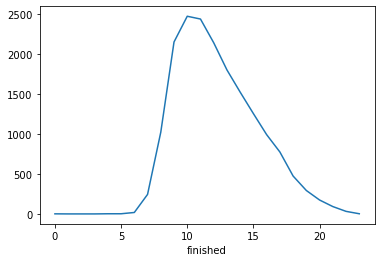

In [124]:
df[(df.status == 'finished')].groupby(df['finished'].dt.hour)['itinerary_id'].count().plot()